<div style=" background-color: #AFDDFF; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

<div style=" background-color: #60B5FF; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">
    
## Step 1 | Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
from matplotlib.colors import LinearSegmentedColormap

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)
sns.set_style("whitegrid")  # Set Seaborn style for consistent visualizations
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [3]:
# Define Project Theme For Visual Plots
 
sky_blue_palette = ['#4CC9FE', '#37AFE1', '#A0DEFF', '#03AED2', '#FFD700']
sns.set_style('whitegrid')  # Use Seaborn's whitegrid style as base
sns.set_palette(sky_blue_palette)  # Set Seaborn palette
sky_blue_colors = ['#B0E0E6', '#87CEEB', '#4682B4']  # Light to dark sky blue
sky_blue_cmap = LinearSegmentedColormap.from_list('sky_blue_cmap', sky_blue_colors) # For Heatmaps
plt.rcParams.update({
    'axes.facecolor': '#F5F8FA',  # Light gray-blue background
    'axes.edgecolor': '#4682B4',  # Dark sky blue edges
    'axes.labelcolor': '#2F4F4F',  # Navy blue labels
    'xtick.color': '#4A4A4A',  # Gray ticks
    'ytick.color': '#4A4A4A',
    'grid.color': '#B0E0E6',  # Light sky blue grid
    'font.family': 'Arial',
    'font.size': 12,
    'figure.facecolor': '#FFFFFF',  # White figure background
    'text.color': '#3A59D1',  # Navy blue text
})

In [4]:
# Import The Dataset(Telco Costumer Churn)

dataset = pd.read_csv("Telco Customer Churn.csv")

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">

## Step 2 | Dataset Overview

In [5]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(f"Shape of dataset:\n {dataset.shape}")

Shape of dataset:
 (7043, 21)


In [8]:
print(f"Dataset types:\n\n {dataset.dtypes}")

Dataset types:

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
print(f"Missing values:\n\n {dataset.isnull().sum()}")

Missing values:

 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
print(f"Feature Unique values:\n\n {dataset.nunique()}")

Feature Unique values:

 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750


<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
At first glance based on the above results, we can see that:
* The dataset contains 21:Features and 7043 observation, We'll explain each of the columns further.
* Our dataset has "Object" "Int64" "Float64" types, which we need to examine them later. we have inccorect type Feature "TotalCharges" and "SeniorCitizen" so we'll fix it later.
* There are no missing values in the dataset.
* We can see that most of the Features are categorical and the other are numeric(tenure, MonthlyCharges, TotalCharges).

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Dataset Information**

Telco customer churn contains information about a fictitious telecom company providing home phone and Internet services to 7043 customers in California in the third quarter. It includes which customers left, stayed or signed up for service.

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

**Dataset Features:**
* CustomerId : Customer Identification
* Gender : Gender
* SeniorCitizen : Whether the customer is a senior citizen (1, 0)
* Partner : Whether the client has a partner (Yes, No) ? Married or not. Living together, being roommates
* Dependents : Whether the client has dependents (Yes, No) (Child, mother, father, grandmother)
* tenure : Number of months the customer stays with the company
* PhoneService : Whether the customer has phone service (Yes, No)
* MultipleLines : Whether the customer has more than one line (Yes, No, No phone service)
* InternetService : Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security (Yes, No, No Internet service)
* OnlineBackup : Whether the customer has online backup (Yes, No, No Internet service)
* DeviceProtection : Whether the customer has device protection (Yes, No, No Internet service)
* TechSupport : Whether the customer receives technical support (Yes, No, No Internet service)

* StreamingTV : Whether the customer has streaming TV (Yes, No, no Internet service) (The customer has a third-party indicates whether the provider uses the Internet service to broadcast television programs)

* StreamingMovies : Whether the customer has streaming movies (Yes, No, No Internet service) (Customer has a third-party Indicates whether the customer is using the Internet service to stream movies from the provider)

* Contract : Duration of the customer's contract (Month to month, One year, Two years)

* PaperlessBilling : Whether the customer has a paperless bill (Yes, No)
* PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic)
* MonthlyCharges : Amount charged to the customer monthly
* TotalCharges : Total amount charged to the customer
* Churn : Whether the customer is using or not (Yes or No) - Customers who left in the last month or quarter.

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">
    
## Step 3 | Data Cleaning

In [12]:
# Remove "CostumerId" column from dataset:

dataset = dataset.drop("customerID", axis=1)

In [13]:
# Change the "TotalCharges" feature to its actual type

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors="coerce")

In [14]:
# Identify categorical and numerical features

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = dataset.drop(labels=num_cols, axis=1).drop("Churn", axis=1).columns

In [15]:
dataset.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Fill "TotalCharge" missing values with mean value for numerical data:

dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())

In [17]:
dataset[dataset.duplicated()].shape[0]

22

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">
    
## Step 4 | Exploratory Data Analysis

<div style=" background-color: #4CC9FE; color: #102E50; padding: 4px; border-radius: 50px 0px 50px 0px; text-align: center; font-size: 100%; font-family: Arial; width: 60%">    
    
### Step 4.1 | Numerical Analysis

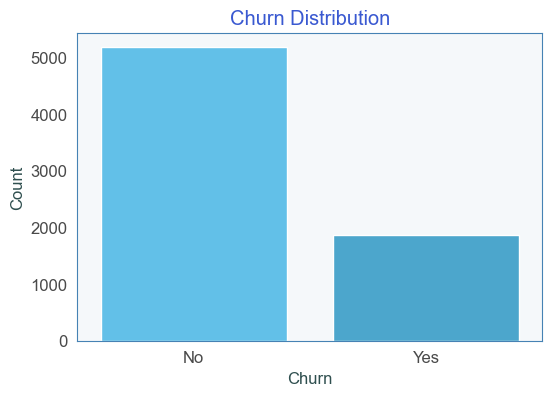

Churn Distribution % :
 Churn
No    73.463
Yes   26.537
Name: proportion, dtype: float64 


In [18]:
# Target Variable Analysis: Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dataset, hue="Churn")
plt.title('Churn Distribution')
plt.grid(visible=False)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print(f"Churn Distribution % :\n {dataset['Churn'].value_counts(normalize=True) * 100} " )

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

**Results**
* ~73% of customers do not churn (No), while ~27% do (Yes).
* The dataset has a churn rate of about 27%, making it imbalanced. We use SMOTE to oversample the minority class (churning customers) in the training set, ensuring the model isn’t biased toward the majority class.

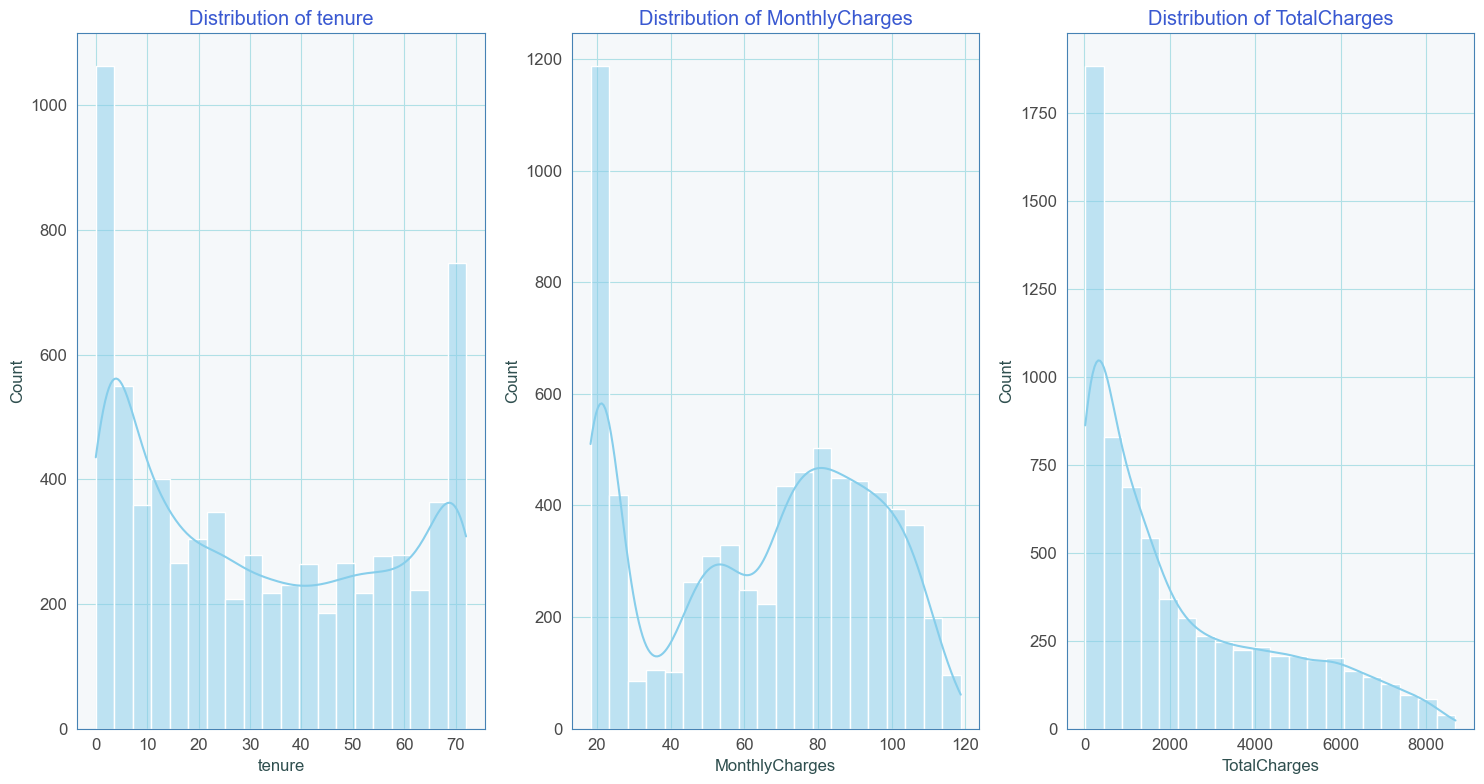

In [19]:
# Numerical Features Analysis
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(dataset[col], bins=20, color='skyblue', kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Results:**
* tenure: Right-skewed; many customers have short tenures (0-10 months), with a peak near 70 months.
* MonthlyCharges: Multimodal; peaks suggest different pricing tiers (e.g., ~$20, ~$80).
* TotalCharges: Right-skewed; reflects accumulation over time, with a spike at lower values.

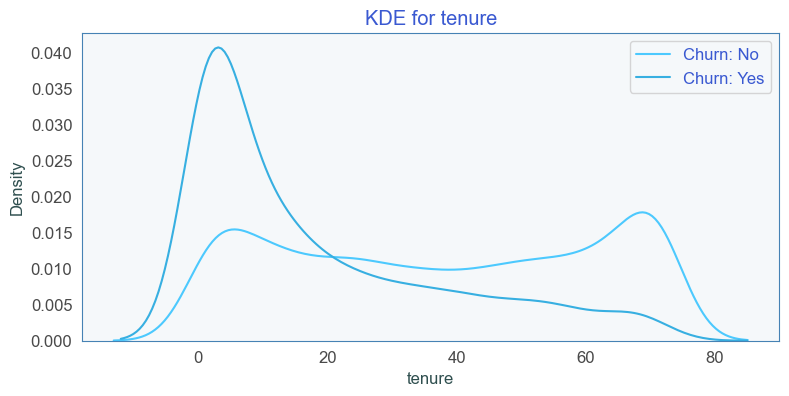

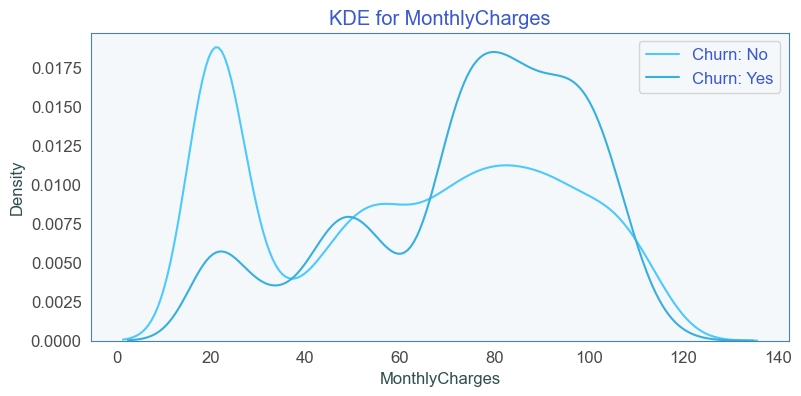

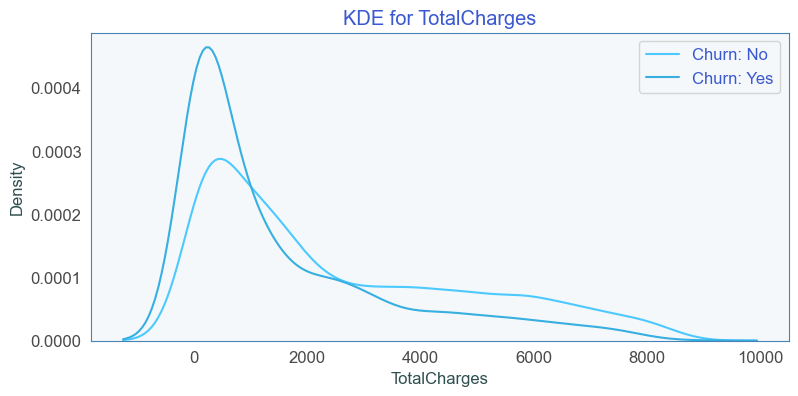

In [20]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")
    ax0 = sns.kdeplot(dataset[dataset['Churn'] == 'No'][feature].dropna(), label= 'Churn: No')
    ax1 = sns.kdeplot(dataset[dataset['Churn'] == 'Yes'][feature].dropna(), label= 'Churn: Yes')
    plt.legend()
    plt.grid(visible=False)
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Results:**
* Recent clients are more likely to churn
* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features

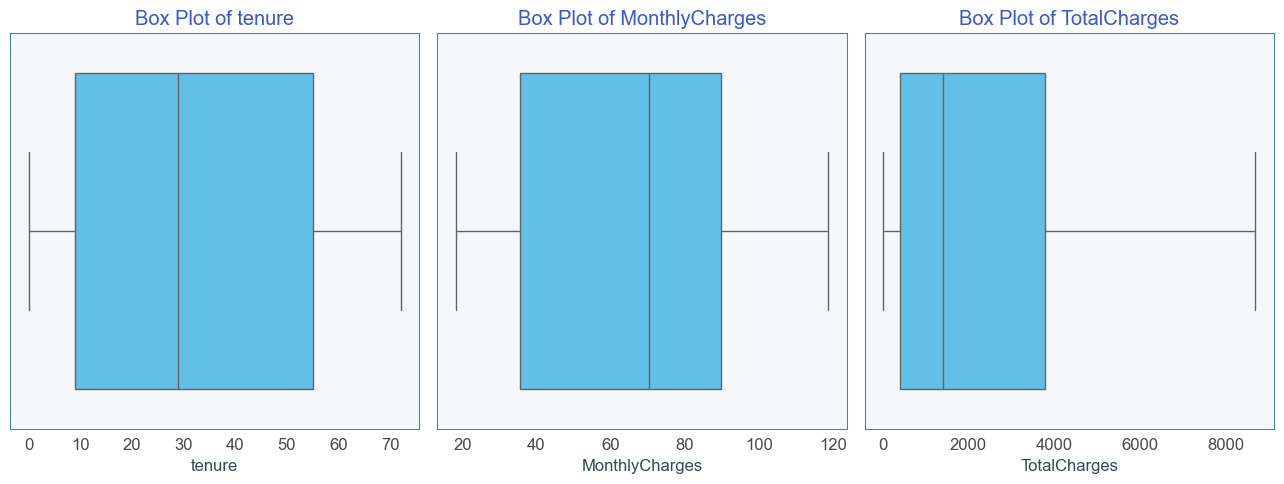

In [21]:
plt.figure(figsize=(13, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=dataset[col])
    plt.title(f'Box Plot of {col}')
    plt.grid(visible=False)
plt.tight_layout()
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Results:**
* tenure: No extreme outliers; ranges from 0 to 72 months.
* MonthlyCharges: A few high outliers (e.g., >100), possibly premium plans.
* TotalCharges: Some high outliers (e.g., >$6000), likely long-tenure customers.

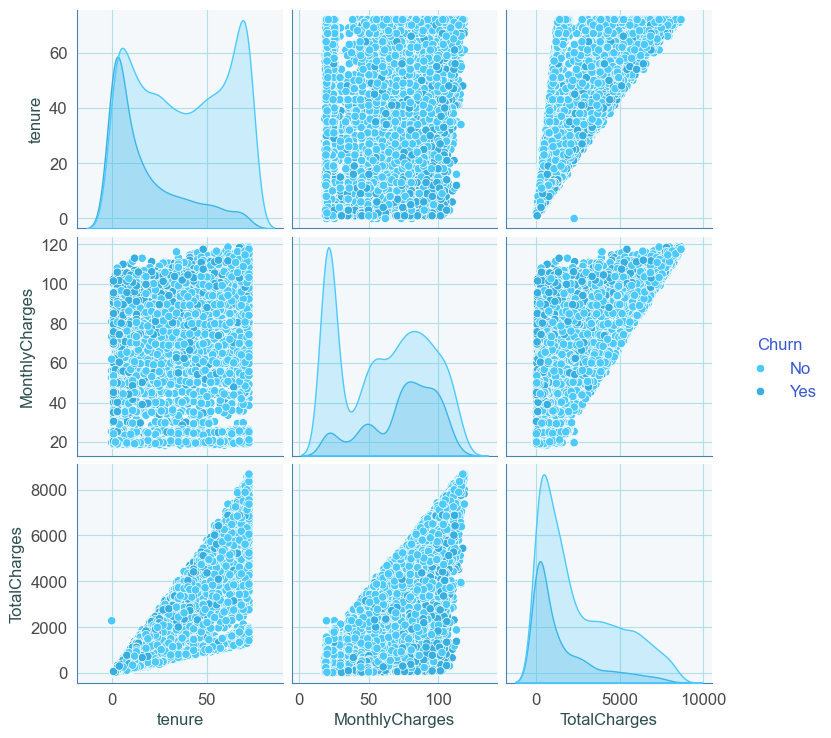

In [22]:
sns.pairplot(dataset[num_cols + ['Churn']], hue='Churn')
plt.grid(visible=False)
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Results:**
* tenure vs. TotalCharges: Strong positive relationship (longer tenure = higher total charges).
* Churn clusters: Churning customers often have low tenure and high MonthlyCharges.

<div style=" background-color: #4CC9FE; color: #102E50; padding: 4px; border-radius: 50px 0px 50px 0px; text-align: center; font-size: 100%; font-family: Arial; width: 60%">
    
### 4.2 | Categorical Analysis

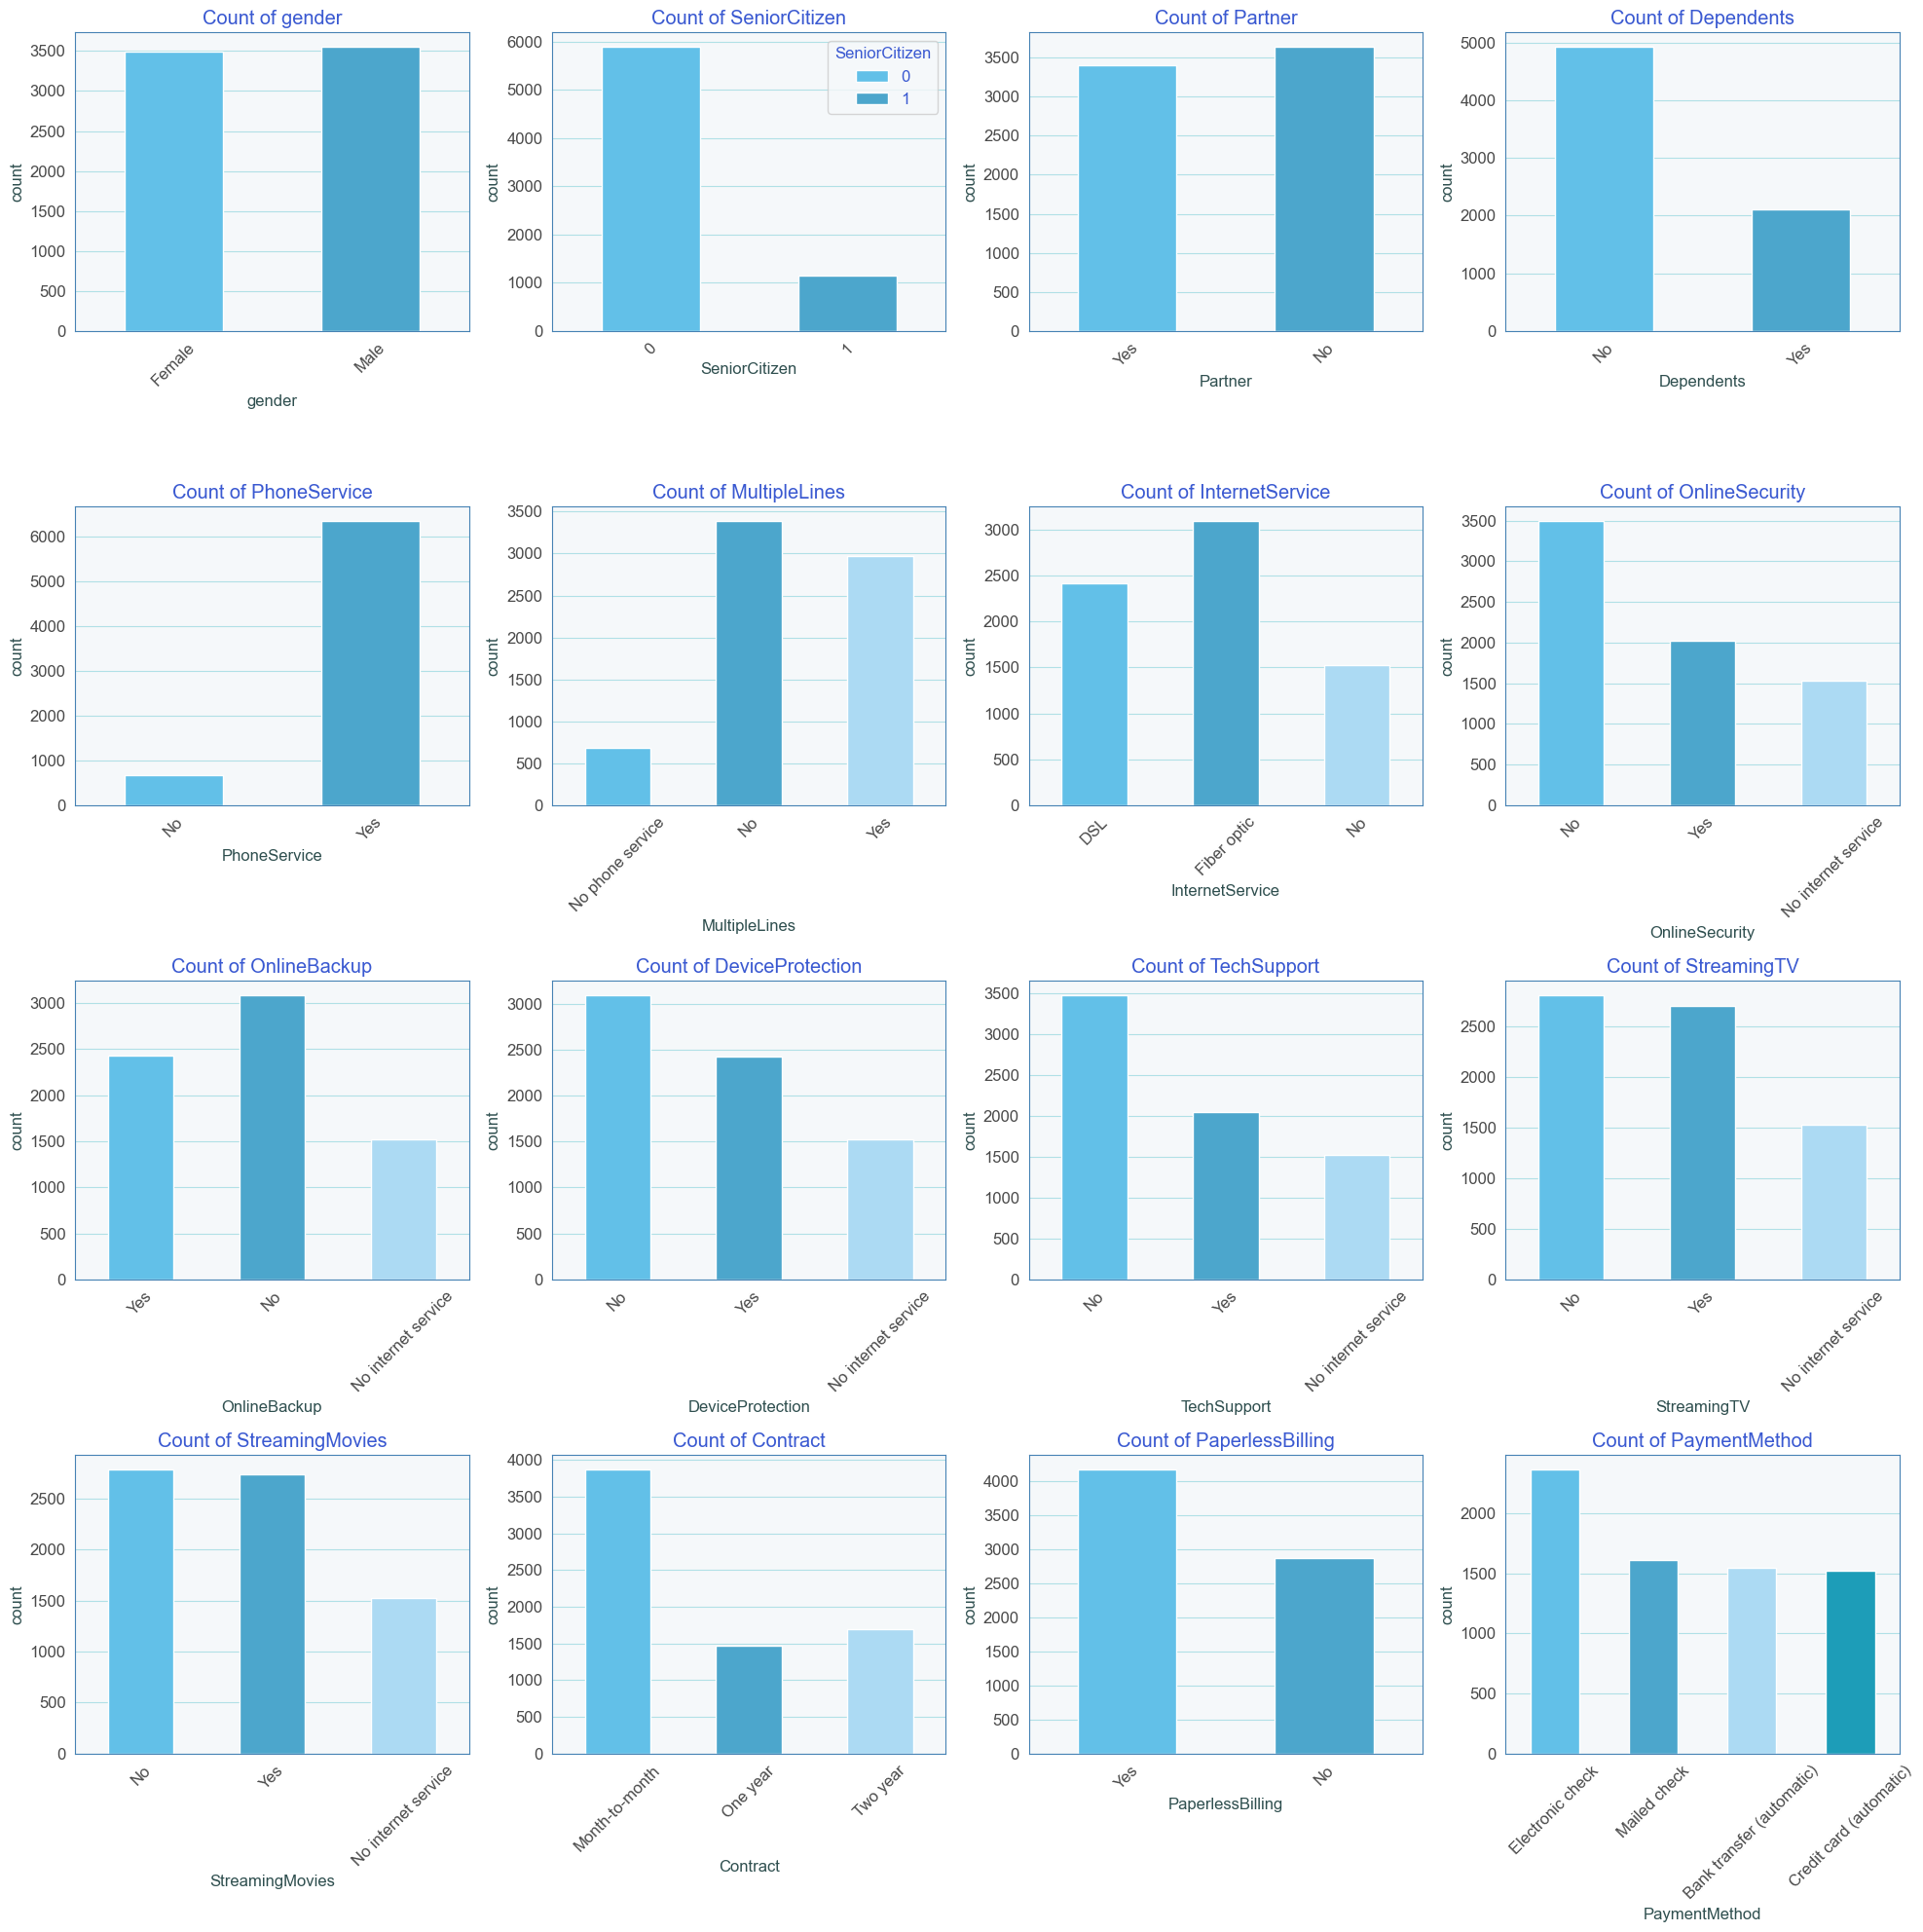

In [23]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=dataset, hue=col, width=0.5)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Observation:**
* gender: Nearly balanced (Male ~ Female).
* Contract: Month-to-month dominates (~55%), followed by two-year and one-year.
* PaymentMethod: Electronic check is most common.
* Binary features (e.g., Partner, Dependents): Fairly balanced.

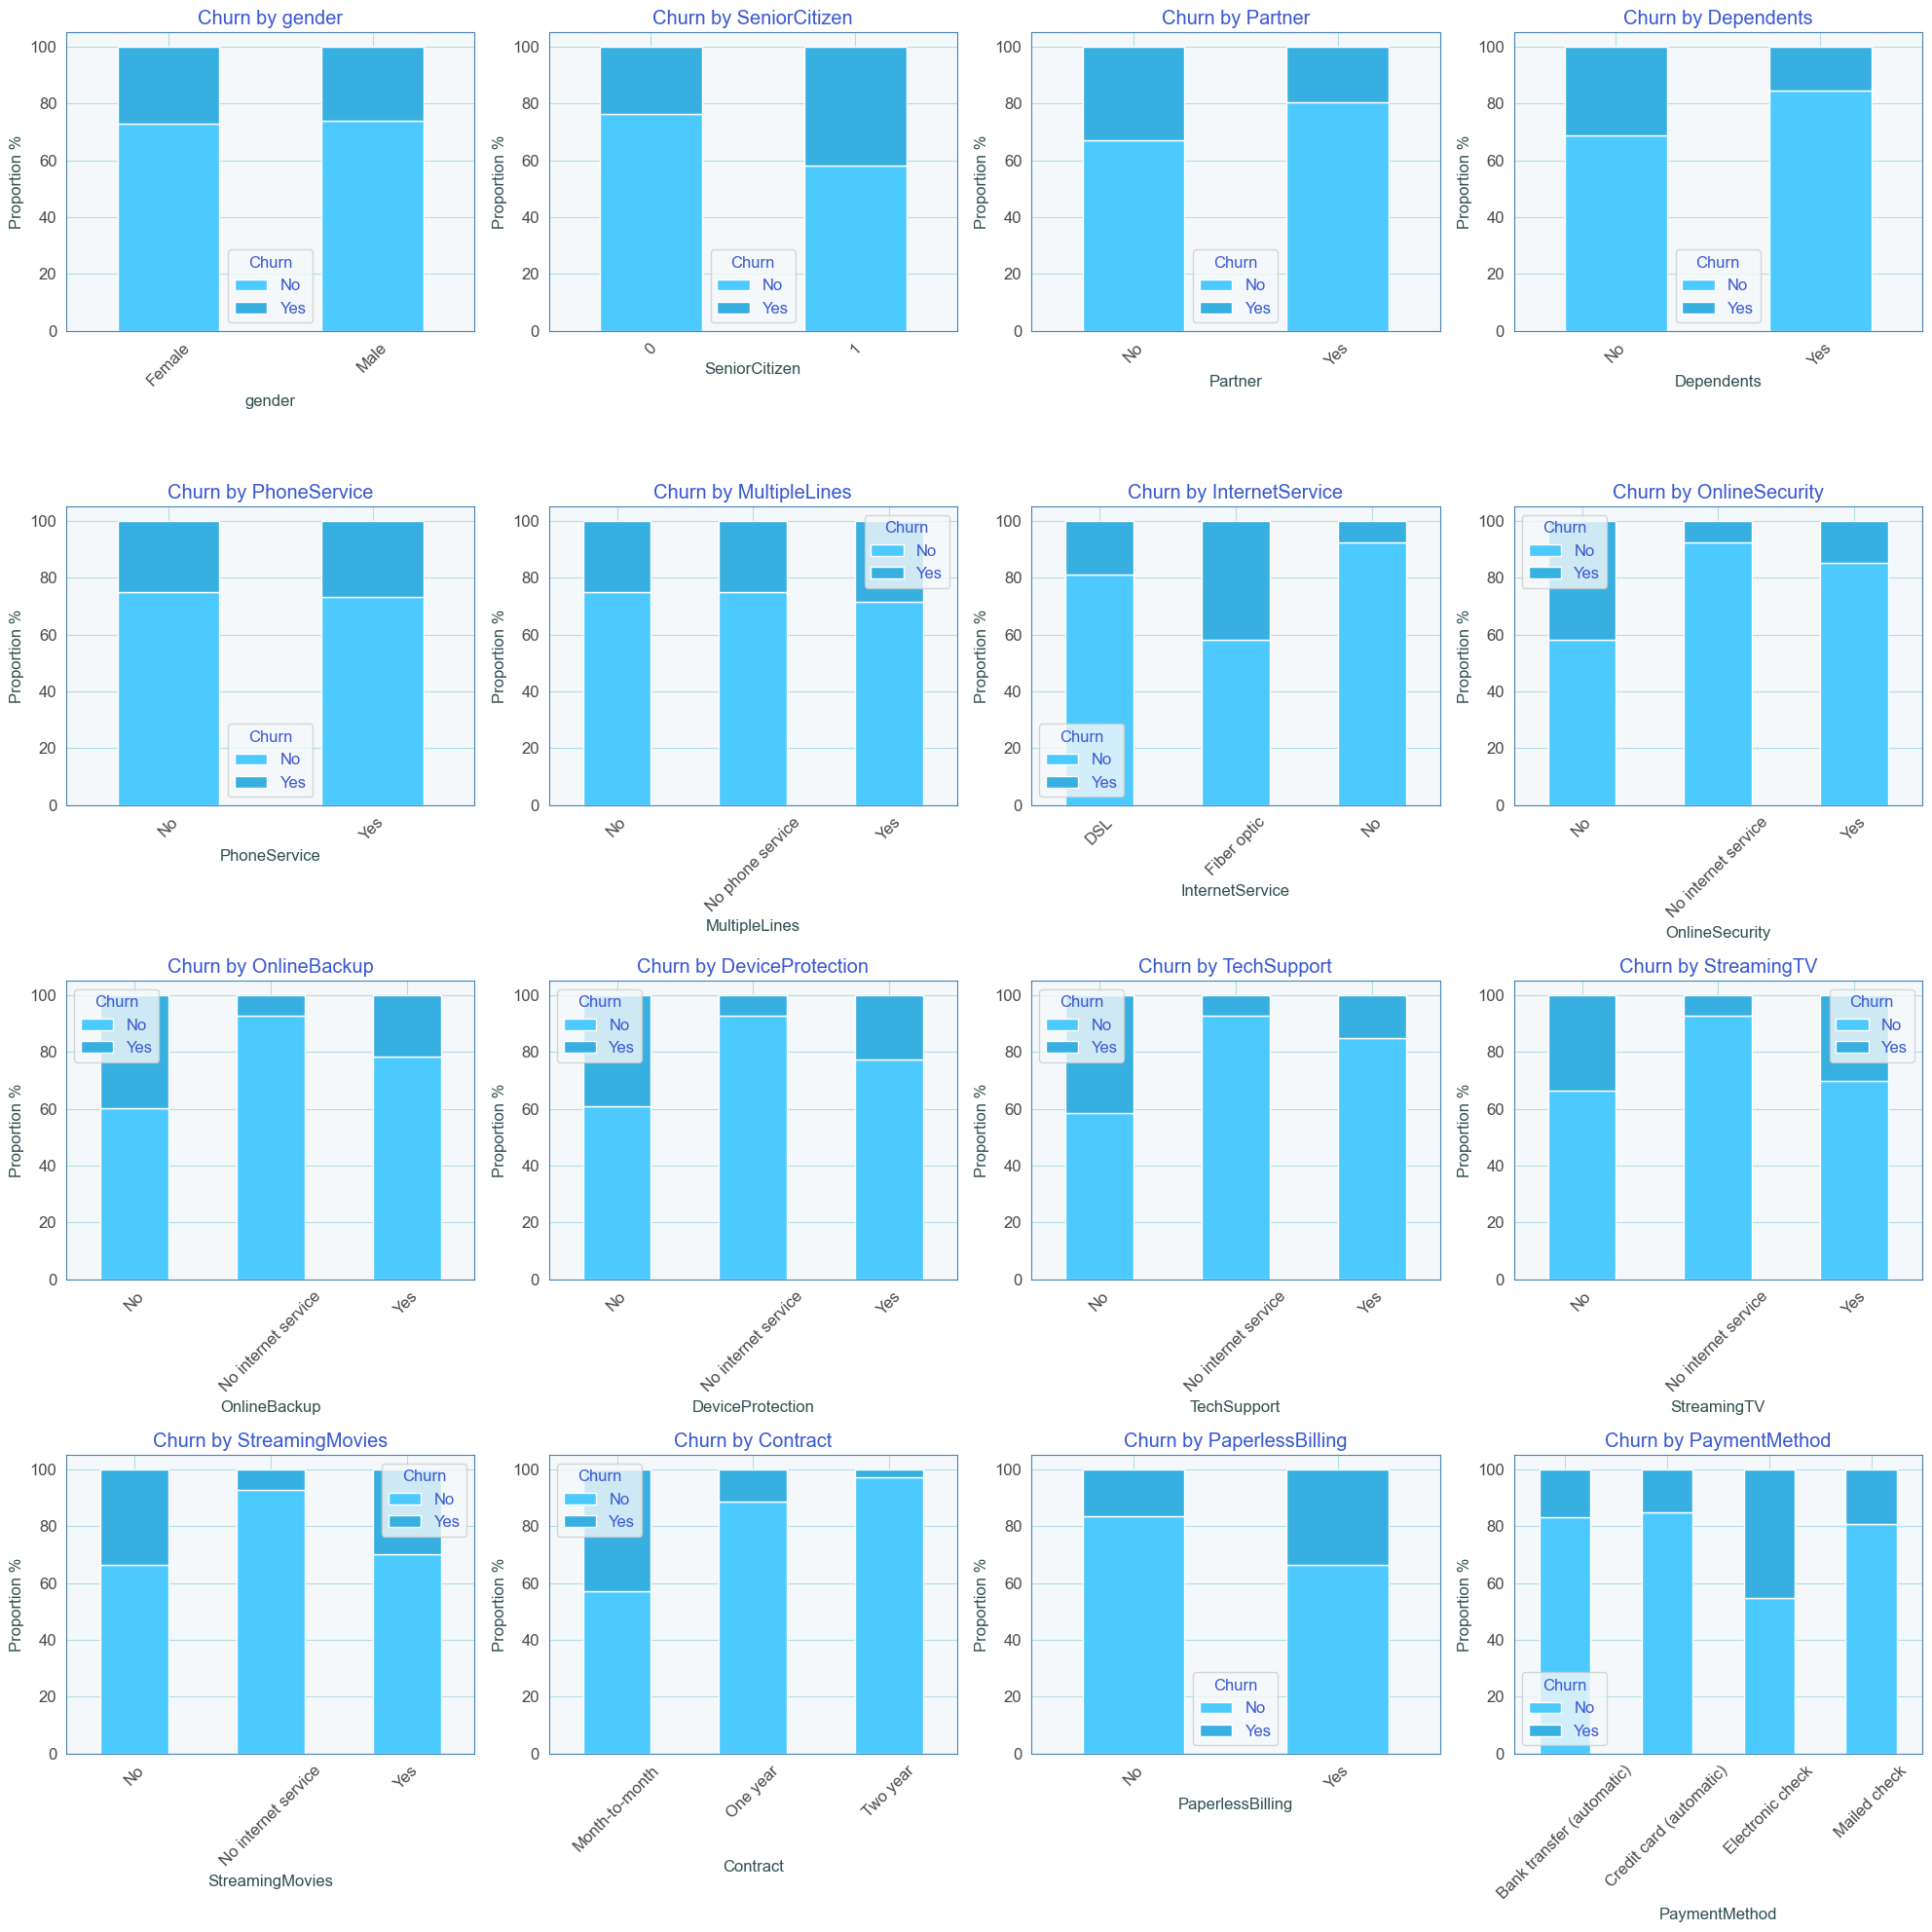

In [24]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    churn_prop = dataset.groupby(col)['Churn'].value_counts(normalize=True).unstack() *100
    churn_prop.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Churn by {col}')
    plt.ylabel('Proportion %')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Insigts:**
* Contract: Month-to-month has the highest churn rate (~40%), while two-year has the lowest (~5%).
* InternetService: Fiber optic has higher churn (~40%) than DSL or no internet.
* PaymentMethod: Electronic check shows the highest churn (~45%).
* OnlineSecurity, TechSupport, etc.: “No” categories consistently have higher churn rates.

<div style=" background-color: #4CC9FE; color: #102E50; padding: 4px; border-radius: 50px 0px 50px 0px; text-align: center; font-size: 100%; font-family: Arial; width: 60%">

### 4.3 | Correlation Analysis

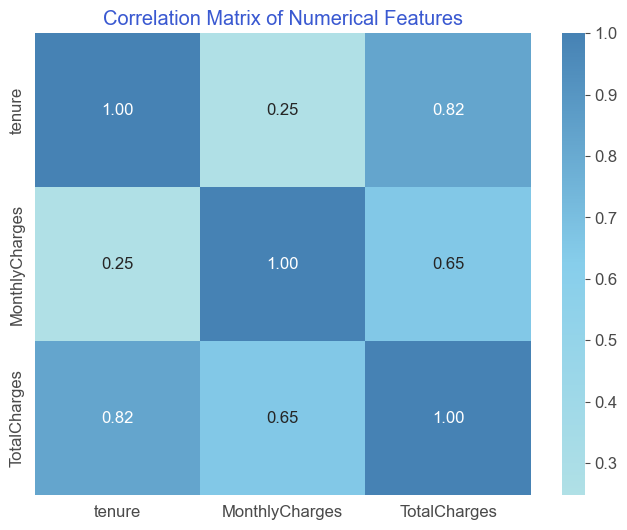

In [25]:
corr = dataset[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap=sky_blue_cmap, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Observation:**
* tenure and TotalCharges: High correlation (~0.83), indicating multicollinearity.
* MonthlyCharges has weaker correlations with both.
* We'll remove TotalCharges because it’s highly correlated with tenure and MonthlyCharges, reducing multicollinearity that could affect model performance.

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
**Overview:**
* Short tenure and high MonthlyCharges are linked to churn.
* TotalCharges correlates strongly with tenure.
* High churn with month-to-month Contract, fiber optic InternetService, and electronic check PaymentMethod.
* Lack of services (e.g., OnlineSecurity, TechSupport) increases churn.

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">

## Step 5 | Preprocessing

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
We preprocess the dataset by handling missing values, removing unnecessary features, encoding categorical variables,
and preparing the target variable. This ensures the data is clean and ready for machine learning models.

**Steps:**
* Remove unnecessary feature
* Encode Categorical features
* Encode target
* Split dataset to (x= features, y=target)
* Apply resampling using over or under sampling with SMOTE (to treat imbalanced dataset)
* Then Scale the dataset and prepare for model creating

In [26]:
# Drop 'TotalCharges' due to high correlation with 'tenure' and 'MonthlyCharges'

dataset= dataset.drop(labels=['TotalCharges'], axis=1)

In [27]:
# Encode categorical features using one-hot encoding

encoded_dataset = pd.get_dummies(dataset, columns=cat_cols, drop_first=True, dtype=int)

In [28]:
# Encode target variable 'Churn' (No=0, Yes=1)

le = LabelEncoder()
encoded_dataset["Churn"] = le.fit_transform(encoded_dataset["Churn"])

In [29]:
# Split features (x) and target (y)

x = encoded_dataset.drop(labels=["Churn"], axis=1).values # Our Features
y = encoded_dataset["Churn"].values # Our Target Dataset

In [30]:
# Handle class imbalance using SMOTEENN on training data

sample = SMOTEENN()
x_smote, y_smote = sample.fit_resample(x, y)

print("Original shape:", x.shape, y.shape)
print("SMOTE shape:", x_smote.shape, y_smote.shape)

Original shape: (7043, 29) (7043,)
SMOTE shape: (6818, 29) (6818,)


In [31]:
# Split data into training and testing sets (80% train, 20% test)

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [32]:
# Scale the Numerical features(Standard Scaler)
# Since the Numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

scaler = StandardScaler()

x_train[:, 0:2] = scaler.fit_transform(x_train[:, 0:2])
x_test[:, 0:2] = scaler.transform(x_test[:, 0:2])

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

* Use the StandardScaler from scikit-learn to standardize the numerical features, transforming them to have a mean of 0 and a standard deviation of 1.
* Apply this scaling only to the numerical features, keeping the categorical features unchanged.

* train_test_split divides the data into 80% training and 20% testing sets, with a fixed random_state for reproducibility.

* fit_transform on the training data fits the scaler and transforms the data in one step.
* transform on the testing data applies the same scaling (fitted on training data) to avoid leakage.

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

**Why Scale the Dataset?**
* Scaling is crucial for machine learning models that rely on distance calculations (e.g., SVM, k-NN) or gradient descent (e.g., logistic regression, neural networks), as these models perform better when features are on the same scale. While tree-based models like random forests don’t require scaling, it’s a good practice to apply it consistently, especially if you’re testing multiple algorithms

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

* Imbalanced Data: The dataset has a churn rate of about 27%, making it imbalanced. We use SMOTE to oversample the minority class (churning customers) in the training set, ensuring the model isn’t biased toward the majority class.
* Highly Correlated Features: TotalCharges is removed because it’s highly correlated with tenure and MonthlyCharges, reducing multicollinearity that could affect model performance.
* Categorical Encoding: One-hot encoding converts categorical variables into numerical format, as SMOTE requires numerical input.
Order of Steps: We remove TotalCharges, encode features, split the data, and then apply SMOTE to the training set only, avoiding data leakage.

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">

## Step 6 | Defining Helper Function

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">
    
We define helper functions for hyperparameter tuning, cross-validation, model evaluation, and visualization.
These functions are modular and reusable, ensuring consistent evaluation across all models.

* **Create Gridsearch function**
* **Create K-Fold Cross Validation function**
* **Create Evaluation Metrics Function**
* **Create Visual Evaluation Functions**

In [33]:
import time
def grid_search(params, model, name, x_test, y_test):

    """
    Perform grid search to find the best hyperparameters for a model and evaluate initial performance.
    
    Parameters:
    - model: The machine learning model
    - name: Model name (string)
    - params: Dictionary of hyperparameter grids
    - x_train, y_train: Training data
    - x_test, y_test: Test data
    
    Returns:
    - Best estimator and parameters from grid search
    """
    
    y_pred = model.predict(x_test)
    params = [params]
    start_time = time.time()
    grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", cv=10)
    grid.fit(x_train, y_train)
    end_time = time.time()

    print(f"Initial {name} Accuracy:{accuracy_score(y_test, y_pred)}\n")
    print(f"{name} Best Estimator: {grid.best_estimator_}\n")
    print(f"{name} Best Params: {grid.best_params_}\n")
    print(f"{name} Best Score: {grid.best_score_}\n")
    
    print(f"{name} timing: {int(end_time - start_time)} Sec")

In [34]:
def cross_validation(model, name, x_train, y_train):

    """
    Perform 10-fold cross-validation and return average performance metrics.
    
    Parameters:
    - model: The machine learning model
    - name: Model name (string)
    - x_train, y_train: Training data
    
    Returns:
    - Dictionary of average metrics
    """
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    return [results, results.mean()]
    

In [35]:
def model_evaluation(model, name, x_train, y_train, x_test, y_test):

    """
    Evaluate a model on the test set and return performance metrics.
    
    Parameters:
    - model: The machine learning model
    - name: Model name (string)
    - x_train, y_train: Training data
    - x_test, y_test: Test data
    
    Returns:
    - List of metrics
    """

    cls = model.fit(x_train, y_train)
    y_pred = cls.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1]

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    # Precision Score
    precision = precision_score(y_test, y_pred)
    # Recall Score
    recall = recall_score(y_test, y_pred)
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    # AUC Curve
    roc_score = roc_auc_score(y_test, y_proba)
    
    return [name, accuracy, precision, recall, f1, roc_score]

In [36]:
def visual_confusion_matrices(models, x_test, y_test):

    """
    Plot confusion matrices for all models in subplots.
    
    Parameters:
    - models: Dictionary of model names and trained models
    - x_test, y_test: Test data
    """

    plt.figure(figsize=(18, 12))
    sns.set_style("white")
    
    for i, (name, model) in enumerate(models.items(), 1):
        # Get predictions
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.subplot(3 , 2, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap=sky_blue_cmap, cbar=False,
                    xticklabels=['Positive', 'Negative'],
                    yticklabels=['Positive', 'Negative'],
                   annot_kws={'color': '#2F4F4F', 'fontsize': 12})
        plt.title(f'Confusion Matrix: {name}', color='#2F4F4F')
        plt.xlabel('Predicted', color='#2F4F4F')
        plt.ylabel('Actual', color='#2F4F4F')
    
    plt.tight_layout()
    plt.show()

In [37]:
# Define function to plot ROC curves

def visual_roc_curves(models, x_test, y_test):

    """
    Plot ROC curves for all models in separate subplots.
    
    Parameters:
    - models: Dictionary of model names and trained models
    - x_test, y_test: Test data
    """

    plt.figure(figsize=(18, 12))
    sns.set_style("whitegrid")
    
    for i, (name, model) in enumerate(models.items(), 1):
        # Create subplot
        plt.subplot(3, 2, i)
        # Get probability scores for the positive class
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', color='#87CEEB', linewidth=2)
        plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', color='#4A4A4A')
        plt.xlabel('False Positive Rate', color='#2F4F4F')
        plt.ylabel('True Positive Rate', color='#2F4F4F')
        plt.title(f'ROC Curve: {name}', color='#2F4F4F')
        plt.legend(loc='lower right', fontsize=10)
        plt.grid(True, color='#B0E0E6')
    
    plt.tight_layout()
    plt.show()

    for name, model in models.items():
        # Get probability scores for the positive class
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')
    
    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc='lower right', fontsize="10")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">

## Step 7 | Model Creation

<div style=" background-color: #4CC9FE; color: #102E50; padding: 4px; border-radius: 50px 0px 50px 0px; font-size: 100%; font-family: Arial; width: 60%; padding-left: 5%">
    
### Step 7.1 | Model Creation and Hyperparameter Tuning

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 105%">

* We define a dictionary of models and their hyperparameter grids, then use grid search to find the best
parameters for each model. The best models are stored for evaluation.

In [38]:
# Initial GBM Model:

gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

gb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
model_name = "Gradient Boosting"

grid_search(gb_params, gboost, model_name, x_test, y_test)


Initial Gradient Boosting Accuracy:0.9486803519061584

Gradient Boosting Best Estimator: GradientBoostingClassifier(max_depth=5)

Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Gradient Boosting Best Score: 0.9554477937964176

Gradient Boosting timing: 111 Sec


In [39]:
# Initial SVM Model:

svm = SVC()
svm.fit(x_train, y_train)

svm_params = { 'C': [0.1, 1], 'kernel': ['rbf', 'poly', 'linear'], "degree":[1,3,5,8,10], 'gamma': ['scale', 'auto'] }
model_name = "SVM"

grid_search(svm_params, svm, model_name, x_test, y_test)

Initial SVM Accuracy:0.9310850439882697

SVM Best Estimator: SVC(C=1, degree=1)

SVM Best Params: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

SVM Best Score: 0.9257435225325136

SVM timing: 335 Sec


In [40]:
# Initial Random Forest Model:

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

forest_params = { 'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10] }
model_name = "Random Forest"

grid_search(forest_params, forest, model_name, x_test, y_test)

Initial Random Forest Accuracy:0.9582111436950147

Random Forest Best Estimator: RandomForestClassifier(n_estimators=200)

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Best Score: 0.9576472762711294

Random Forest timing: 206 Sec


In [41]:
# Initial Logistic Regression

logistic = LogisticRegression(max_iter=5000)
logistic.fit(x_train, y_train)

log_params = { 'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
model_name = "Logistic Regression"

grid_search(log_params, logistic, model_name, x_test, y_test)

Initial Logistic Regression Accuracy:0.8980938416422287

Logistic Regression Best Estimator: LogisticRegression(C=10, max_iter=5000, solver='liblinear')

Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Best Score: 0.9033706354807272

Logistic Regression timing: 10 Sec


In [42]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
model_name = "Ada Boosting"

ada_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1]}
grid_search(ada_params, ada, model_name, x_test, y_test)

Initial Ada Boosting Accuracy:0.9354838709677419

Ada Boosting Best Estimator: AdaBoostClassifier(learning_rate=1, n_estimators=100)

Ada Boosting Best Params: {'learning_rate': 1, 'n_estimators': 100}

Ada Boosting Best Score: 0.9451806297677857

Ada Boosting timing: 32 Sec


<div style=" background-color: #4CC9FE; color: #102E50; padding: 4px; border-radius: 50px 0px 50px 0px; font-size: 100%; font-family: Arial; width: 60%; padding-left: 5%">
    
### Step 7-2 | Create Final Models

In [43]:
metrics = []
columns = ["Model", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score", "ROC Score"]
models = {
    'Logistic Regression': LogisticRegression(C= 0.5, penalty= 'l2', solver= 'liblinear'),
    "Random Forest": RandomForestClassifier(max_depth= 20, min_samples_split= 2, n_estimators= 200),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 100),
    'SVM': SVC(C= 1, degree= 1, gamma= 'scale', kernel= 'rbf', probability=True),
    'Ada Boost': AdaBoostClassifier(learning_rate= 1, n_estimators= 100),
}

for name, model in models.items():
    result = model_evaluation(model, name, x_train, y_train, x_test, y_test)
    metrics.append(result)
    
metrics = pd.DataFrame(metrics, columns=columns)
metrics = metrics.set_index("Model")
metrics = metrics.sort_values(by="F1 Score", ascending=False)

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">
    
## Step 8 | Models Evaluation

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

* We evaluate the best models on the test set using multiple metrics (accuracy, precision, recall, F1 score,
ROC-AUC). Results are sorted by F1 score to prioritize balanced performance.

* We visualize model performance using a bar plot for F1 scores, confusion matrices, and ROC curves.
These plots provide intuitive insights into model effectiveness and are saved for portfolio inclusion.

In [44]:
metrics

,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC Score
Model,,,,,
Gradient Boosting,0.955,0.959,0.965,0.962,0.989
Random Forest,0.954,0.963,0.959,0.961,0.990
Ada Boost,0.940,0.938,0.962,0.950,0.985
SVM,0.931,0.937,0.947,0.942,0.979
Logistic Regression,0.897,0.909,0.918,0.914,0.961


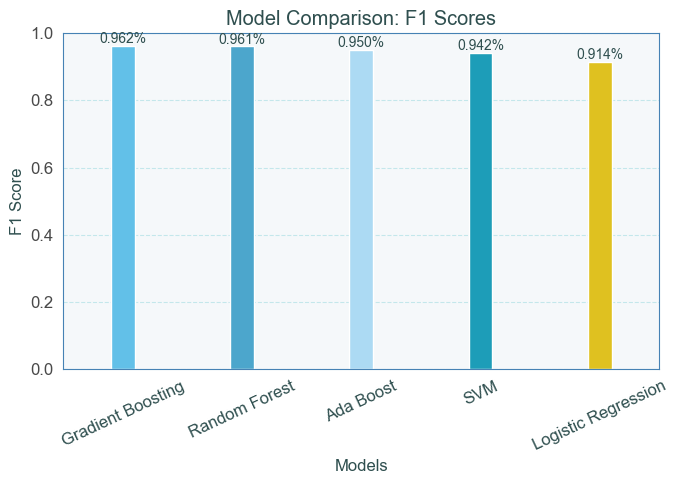

In [45]:
# Create a bar plot of models and their scores:

plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Model', y='F1 Score', data=metrics, hue="Model", legend=False, width=0.2)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='#2F4F4F', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Comparison: F1 Scores', color='#2F4F4F')
plt.xlabel('Models', color='#2F4F4F')
plt.ylabel('F1 Score', color='#2F4F4F')
plt.xticks(rotation=25, color='#2F4F4F')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', color='#B0E0E6', alpha=0.7)
plt.tight_layout()
plt.show()

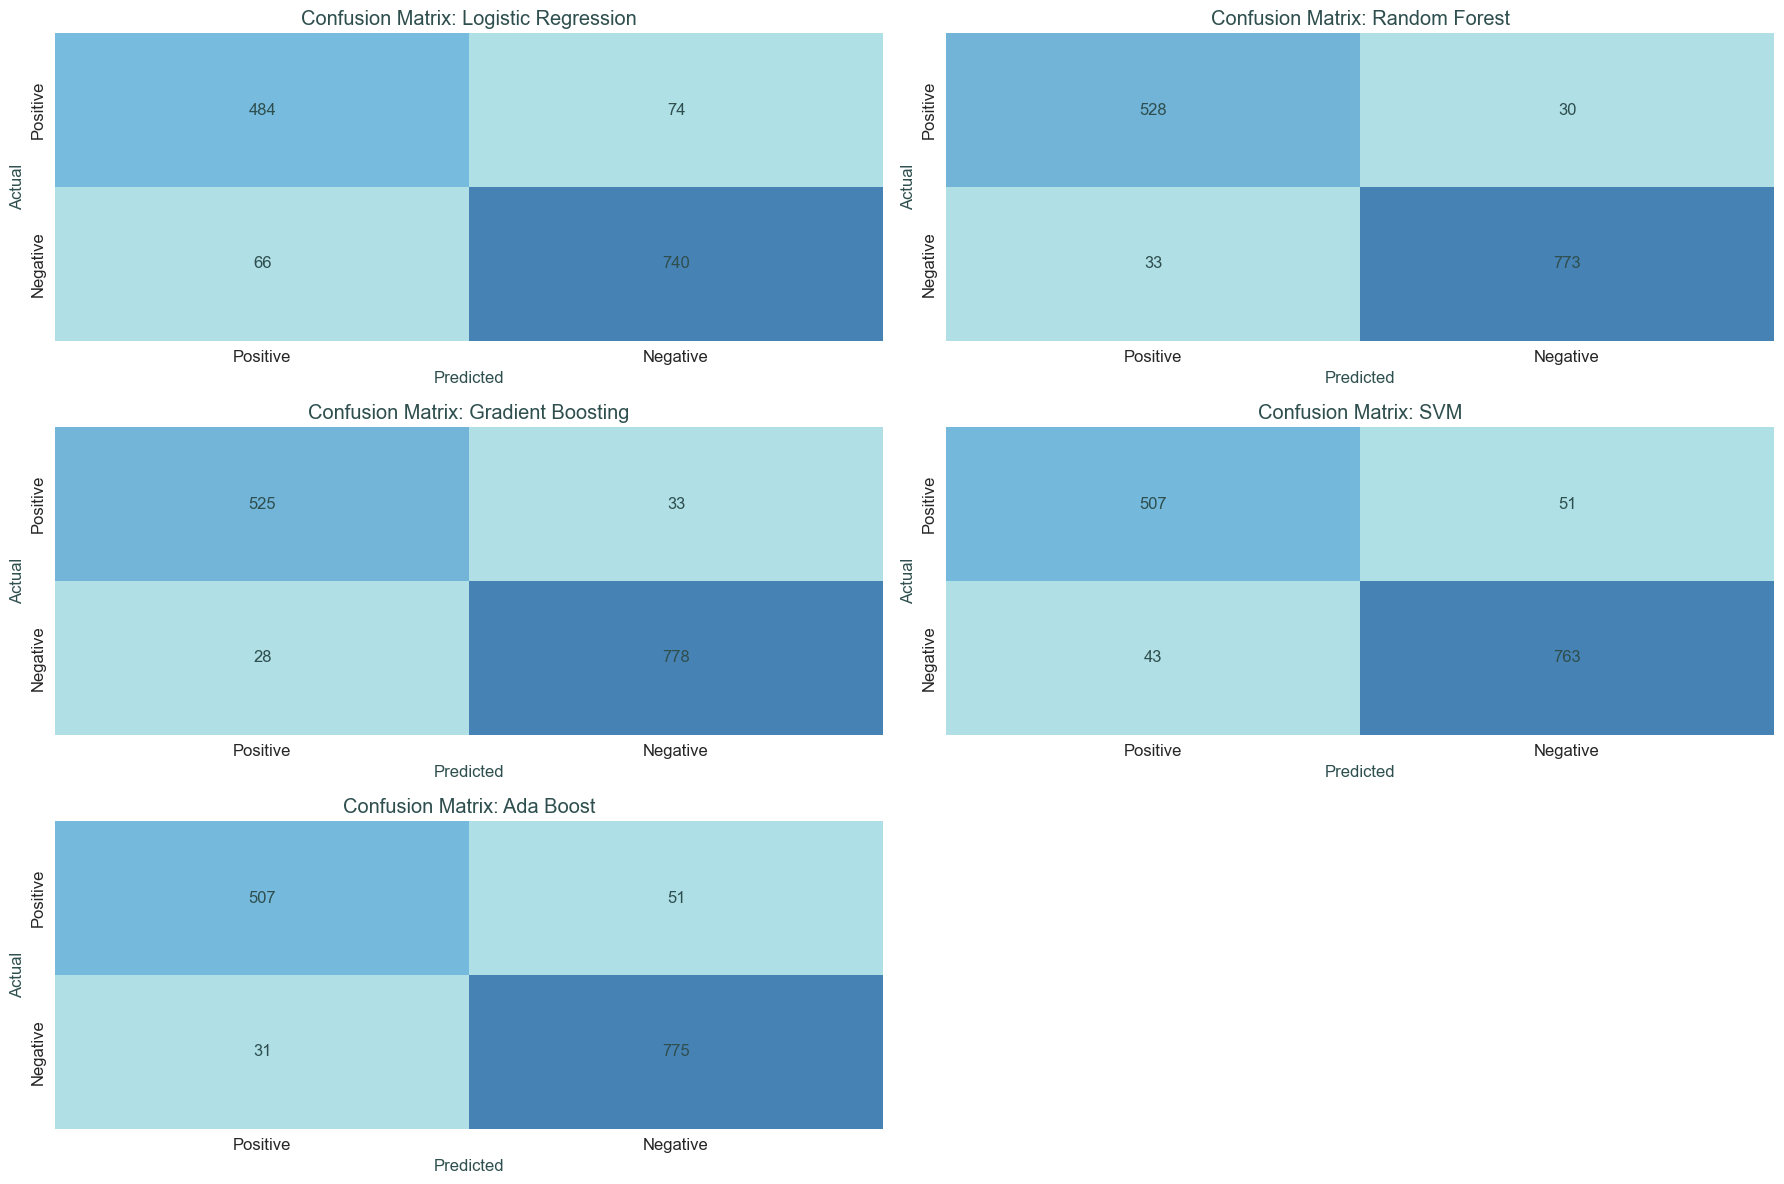

In [46]:
visual_confusion_matrices(models, x_test, y_test)

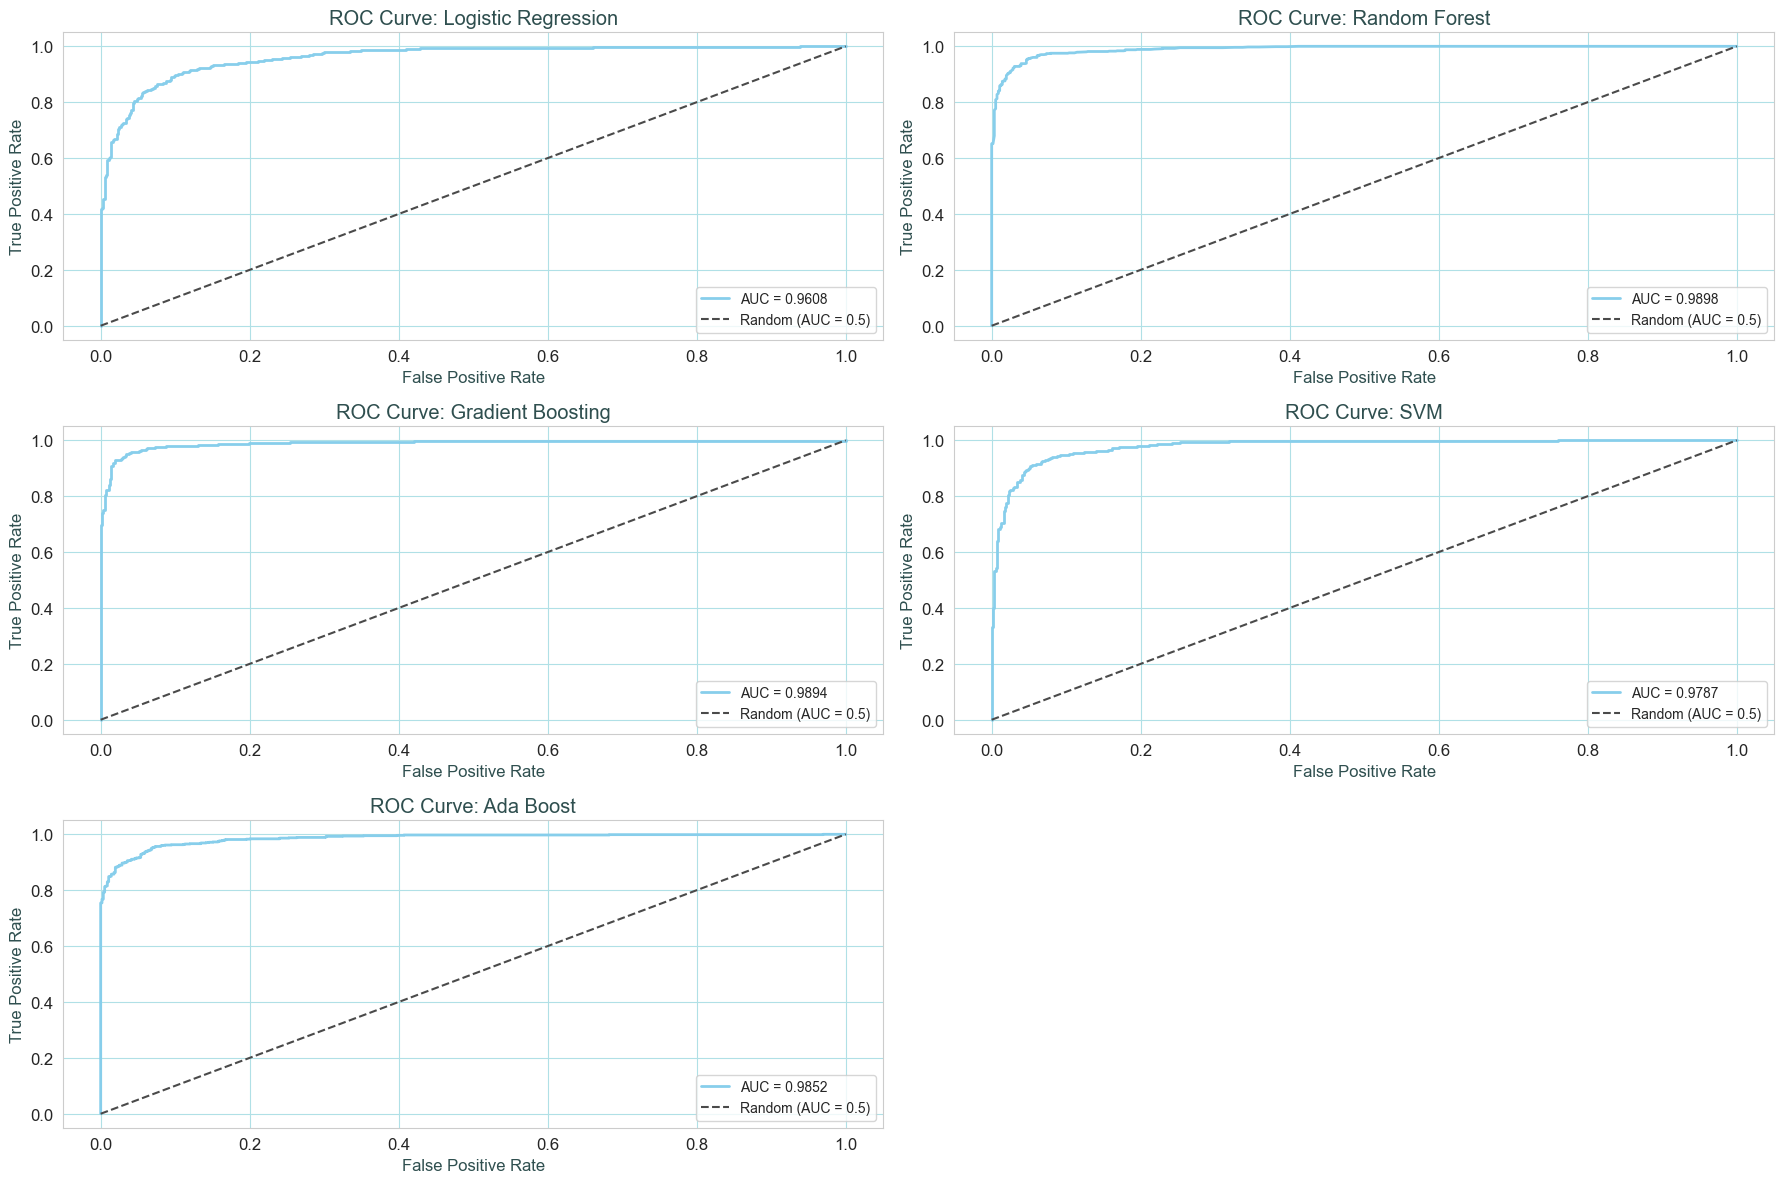

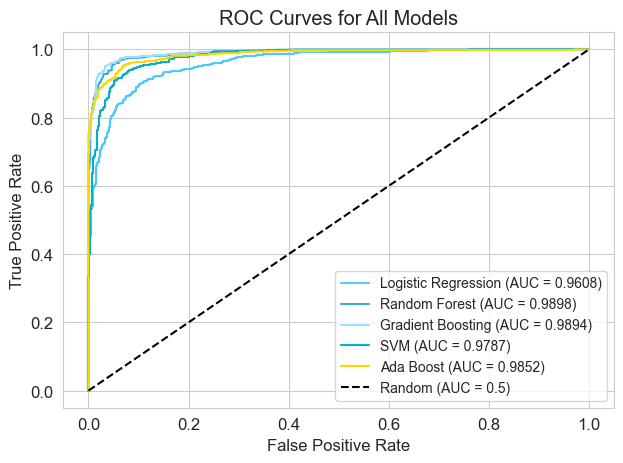

In [47]:
# Visualizing the ROC Curve to better evaluate our models:

visual_roc_curves(models, x_test, y_test)

<div style=" background-color: #4CC9FE; color: #102E50; padding: 8px; border-radius: 50px; text-align: center; font-size: 110%; font-family: Arial">

## Step 9 | Project Summary

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">

This project successfully built and evaluated machine learning models to predict customer churn.
Key findings:
* The dataset was preprocessed to handle missing values, encode categorical features, and address class imbalance.
* Grid search identified optimal hyperparameters for each model.
* Cross-validation ensured robust performance estimates.
* The best model (based on F1 score) can be used for targeted customer retention strategies.
* Visualizations (ROC curves, confusion matrices, F1 score bar plot) provide clear insights into model performance.

<div style=" background-color: #AFDDFF; color: #102E50; padding: 10px; border-radius: 15px; font-family: Arial; font-size: 108%">


* **Business Implications**

The results have significant implications for the telecommunications company:

* Targeted Retention: The Gradient Boosting model, with its high F1 score and ROC-AUC, can accurately identify high-risk customers, enabling the company to focus retention efforts (e.g., discounts, loyalty programs) on those most likely to churn.
* Cost Savings: By reducing churn, the company can save on customer acquisition costs, which are often 5-10 times higher than retention costs.
* Customer Insights: Features like tenure, Contract, and MonthlyCharges (likely among the most important, based on tree-based model feature importance) provide actionable insights for designing retention strategies, such as offering longer-term contracts or competitive pricing.
* Scalability: The modular pipeline allows the company to retrain models on new data or test additional algorithms, ensuring adaptability to changing customer behaviors.

* **Challenges and Solutions**

* Class Imbalance: The 27% churn rate was addressed using SMOTEENN, which balanced the training data without introducing significant bias.
* Multicollinearity: Dropping TotalCharges mitigated redundancy with tenure and MonthlyCharges, improving model interpretability.
* Computational Cost: Grid search for SVM was time-intensive due to large parameter grids and probability=True. This was optimized by using n_jobs=-1 for parallel processing and limiting grid sizes.
* Overfitting Risk: Cross-validation ensured models generalized well, with low standard deviations in performance metrics.

* **Conclusion**

The Telco Customer Churn Prediction project demonstrates a comprehensive approach to solving a critical business problem using machine learning. By preprocessing the dataset, addressing class imbalance, optimizing models with grid search, and evaluating performance with robust metrics and visualizations, the project delivers a high-performing solution for identifying at-risk customers. The Gradient Boosting model emerged as the top performer, offering a reliable tool for targeted retention efforts. The clean, modular codebase, detailed documentation, and saved outputs make this project a strong showcase of data science expertise, ready for inclusion in a professional portfolio.
